## 여러 정리되지 않은 생각들
- 변수들의 n차식 그리고 서로 곱(나누는)는 비선형으로 한번해보기
- 혈압 처방을 받았다면 혈압을 통제하고 있을건데 그러면 몸무게나 다른 팩트들도 정상화 되나?
- 그냥 혈압만 약에대해 통제된다 했을때 국민건강보험공단 데이터에서 고혈압 환자들을 어떻게 구분할까? : 일단, 고협압 환자들이 거의 없을꺼같은 젊은층에서 모델링
- 근데또 혈압은 나이에 따라 (몸무게도 마찬가지) 달라지는데... 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 상관계수
from scipy import stats



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/health_care/NHIS_OPEN_GJ_2017_v1.1.csv'

-rw------- 1 root root 108444299 Oct  7 01:05 '/content/drive/MyDrive/Colab Notebooks/datasets/health_care/NHIS_OPEN_GJ_2017_v1.1.csv'


In [6]:
DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/health_care/NHIS_OPEN_GJ_2017_v1.1.csv', encoding='cp949')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [7]:
# null 값 확인
DF.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [8]:
# 열 삭제하기 (시력)(청력)(구강건강관련) ,기준년도,가입자일년번호, 데이터공개일자, *일단=(혈청지오티)AST 등4개

DF = DF.drop(columns=['기준년도','가입자일련번호','시력(좌)','시력(우)','청력(좌)','청력(우)','구강검진수검여부','치아우식증유무','결손치유무','치아마모증유무','제3대구치(사랑니)이상','치석','데이터공개일자','(혈청지오티)AST','(혈청지오티)ALT','감마지티피'])
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   성별코드         1000000 non-null  int64  
 1   연령대코드(5세단위)  1000000 non-null  int64  
 2   시도코드         1000000 non-null  int64  
 3   신장(5Cm단위)    1000000 non-null  int64  
 4   체중(5Kg단위)    1000000 non-null  int64  
 5   허리둘레         999734 non-null   float64
 6   수축기혈압        999981 non-null   float64
 7   이완기혈압        999982 non-null   float64
 8   식전혈당(공복혈당)   999958 non-null   float64
 9   총콜레스테롤       999957 non-null   float64
 10  트리글리세라이드     999955 non-null   float64
 11  HDL콜레스테롤     999956 non-null   float64
 12  LDL콜레스테롤     997088 non-null   float64
 13  혈색소          999948 non-null   float64
 14  요단백          995408 non-null   float64
 15  혈청크레아티닌      999957 non-null   float64
 16  흡연상태         999856 non-null   float64
 17  음주여부         999464 non-null   object 
dtypes: 

In [9]:
#결측치 제거
DF.dropna(inplace = True)
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991608 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   성별코드         991608 non-null  int64  
 1   연령대코드(5세단위)  991608 non-null  int64  
 2   시도코드         991608 non-null  int64  
 3   신장(5Cm단위)    991608 non-null  int64  
 4   체중(5Kg단위)    991608 non-null  int64  
 5   허리둘레         991608 non-null  float64
 6   수축기혈압        991608 non-null  float64
 7   이완기혈압        991608 non-null  float64
 8   식전혈당(공복혈당)   991608 non-null  float64
 9   총콜레스테롤       991608 non-null  float64
 10  트리글리세라이드     991608 non-null  float64
 11  HDL콜레스테롤     991608 non-null  float64
 12  LDL콜레스테롤     991608 non-null  float64
 13  혈색소          991608 non-null  float64
 14  요단백          991608 non-null  float64
 15  혈청크레아티닌      991608 non-null  float64
 16  흡연상태         991608 non-null  float64
 17  음주여부         991608 non-null  object 
dtypes: float64(12), int64(5)

In [ ]:
# 변수명 정의
sex = DF['성별코드']
age = DF['연령대코드(5세단위)']
city = DF['시도코드']
ht = DF['신장(5Cm단위)']
wt = DF['체중(5Kg단위)']
waist = DF['허리둘레']
sbp = DF['수축기혈압']
dbp = DF['이완기혈압']
fbs = DF['식전혈당(공복혈당)']
tchol = DF['총콜레스테롤']
tg = DF['트리글리세라이드']
hdl = DF['HDL콜레스테롤']
ldl = DF['LDL콜레스테롤']
hgb = DF['혈색소']
upro = DF['요단백']
cr = DF['혈청크레아티닌']
smoking = DF['흡연상태']
alcohol = DF['음주여부']

In [10]:
# 데이터 프레임 변수명 전환
DF = DF.rename(columns={'성별코드':'sex', '연령대코드(5세단위)':'age','시도코드':'city','신장(5Cm단위)':'ht','체중(5Kg단위)':'wt','허리둘레':'waist','수축기혈압':'sbp','이완기혈압':'dbp','식전혈당(공복혈당)':'fbs','총콜레스테롤':'tchol','트리글리세라이드':'tg','HDL콜레스테롤':'hdl','LDL콜레스테롤':'ldl','혈색소':'hgb','요단백':'upro','혈청크레아티닌':'cr','흡연상태':'smoking','음주여부':'alcohol'})

In [27]:
# 음주여부 Y=1,N=0
DF = DF.replace({'Y':1,'N':0})

In [33]:
DF['sex'] = pd.to_numeric(DF['sex'], downcast='float')
DF['age'] = pd.to_numeric(DF['age'], downcast='float')
DF['city'] = pd.to_numeric(DF['city'], downcast='float')
DF['ht'] = pd.to_numeric(DF['ht'], downcast='float')
DF['wt'] = pd.to_numeric(DF['wt'], downcast='float')
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991608 entries, 0 to 999999
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   sex      991608 non-null  float32
 1   age      991608 non-null  float32
 2   city     991608 non-null  float32
 3   ht       991608 non-null  float32
 4   wt       991608 non-null  float32
 5   waist    991608 non-null  float64
 6   sbp      991608 non-null  float64
 7   dbp      991608 non-null  float64
 8   fbs      991608 non-null  float64
 9   tchol    991608 non-null  float64
 10  tg       991608 non-null  float64
 11  hdl      991608 non-null  float64
 12  ldl      991608 non-null  float64
 13  hgb      991608 non-null  float64
 14  upro     991608 non-null  float64
 15  cr       991608 non-null  float64
 16  smoking  991608 non-null  float64
 17  alcohol  991608 non-null  float64
dtypes: float32(5), float64(13)
memory usage: 124.8 MB


In [ ]:
#시간이 너무 많이 걸림
# sns.pairplot(DF)  
# plt.show()

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f904e89f320> (for post_execute):


KeyboardInterrupt: ignored

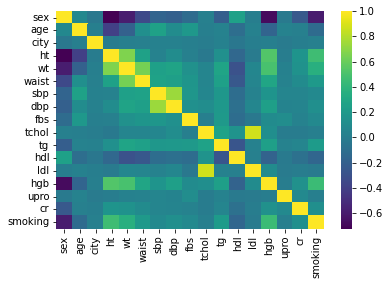

In [ ]:
corr = DF.corr()
sns.heatmap(corr, cmap='viridis')
plt.show()